# Binomial Model

https://en.wikipedia.org/wiki/Binomial_distribution  
https://www.investopedia.com/terms/b/binomialoptionpricing.asp  

In [3]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

def binomial_model(S, K, T, r, vol, n):
    """
    Calculate the option price using the binomial model.

    Parameters:
    S (float): Current stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate
    vol (float): Volatility of the stock
    n (int): Number of time steps

    Returns:
    option_price (float): Option price based on the binomial model
    """

    delta_t = T / n
    u = np.exp(vol * np.sqrt(delta_t))
    d = 1 / u
    p = (np.exp(r * delta_t) - d) / (u - d)

    option_prices = np.zeros((n + 1, n + 1))

    for j in range(n + 1):
        option_prices[n, j] = max(0, S * (u**j) * (d**(n - j)) - K)

    for i in range(n - 1, -1, -1):
        for j in range(i + 1):
            option_prices[i, j] = np.exp(-r * delta_t) * (p * option_prices[i + 1, j] + (1 - p) * option_prices[i + 1, j + 1])

    return option_prices[0, 0]

# Parameters for the binomial model
S0 = data[0]  # Initial stock price
K = S0 + 10  # Strike price
T = 1  # Time to maturity in years
r = 0.03  # Risk-free interest rate
vol = 0.2  # Volatility
n = 100  # Number of time steps

# Calculate the option price using the binomial model
option_price = binomial_model(S0, K, T, r, vol, n)

print(f"Option Price: {option_price:.2f}")

[*********************100%***********************]  1 of 1 completed
Option Price: 1.10


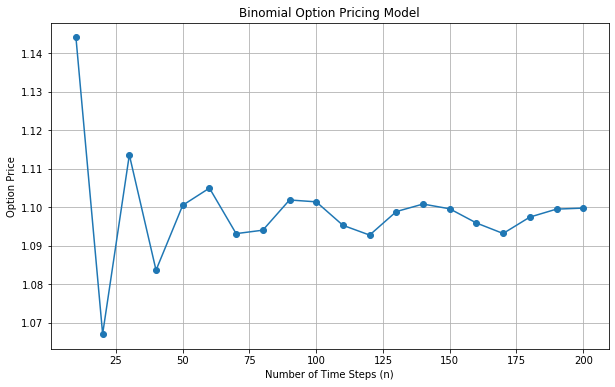

In [4]:

# Define a range of values for the number of time steps
n_values = np.arange(10, 201, 10)

# Initialize an empty list to store option prices
option_prices = []

# Calculate option prices for each value of n
for n in n_values:
    option_price = binomial_model(S0, K, T, r, vol, n)
    option_prices.append(option_price)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(n_values, option_prices, marker='o', linestyle='-')
plt.title('Binomial Option Pricing Model')
plt.xlabel('Number of Time Steps (n)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()

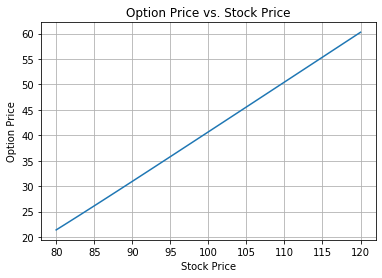

In [5]:
# Plot the option price for different stock prices
stock_prices = np.linspace(80, 120, 41)
option_prices = np.zeros(len(stock_prices))

for i, S in enumerate(stock_prices):
    option_prices[i] = binomial_model(S, K, T, r, vol, n)

plt.plot(stock_prices, option_prices)
plt.xlabel("Stock Price")
plt.ylabel("Option Price")
plt.title("Option Price vs. Stock Price")
plt.grid(True)
plt.show()